In [1]:
##Data Preparation and Exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("exchange_rate.csv")

In [4]:
df

,date,Ex_rate
0,1/1/1990 0:00,0.785500
1,2/1/1990 0:00,0.781800
2,3/1/1990 0:00,0.786700
3,4/1/1990 0:00,0.786000
4,5/1/1990 0:00,0.784900
...,...,...
7583,6/10/2010 0:00,0.718494
7584,7/10/2010 0:00,0.721839
7585,8/10/2010 0:00,0.723197
7586,9/10/2010 0:00,0.720825


In [9]:
print(df['date'].head(10))

0     1/1/1990 0:00
1     2/1/1990 0:00
2     3/1/1990 0:00
3     4/1/1990 0:00
4     5/1/1990 0:00
5     6/1/1990 0:00
6     7/1/1990 0:00
7     8/1/1990 0:00
8     9/1/1990 0:00
9    10/1/1990 0:00
Name: date, dtype: object


In [13]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [14]:
df.set_index('date', inplace=True)

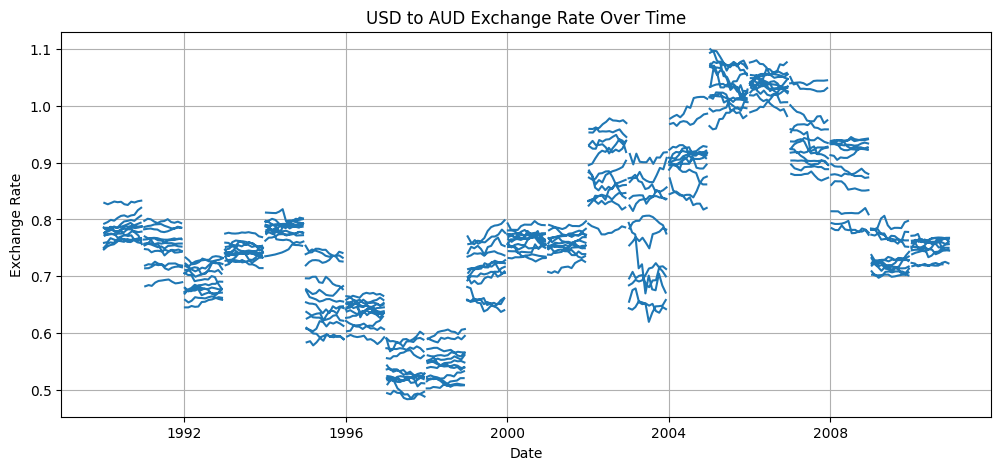

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(df['Ex_rate'])
plt.title("USD to AUD Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.show()

In [16]:
print(df.isnull().sum())

Ex_rate    0
dtype: int64


In [17]:
##ARIMA Modeling

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

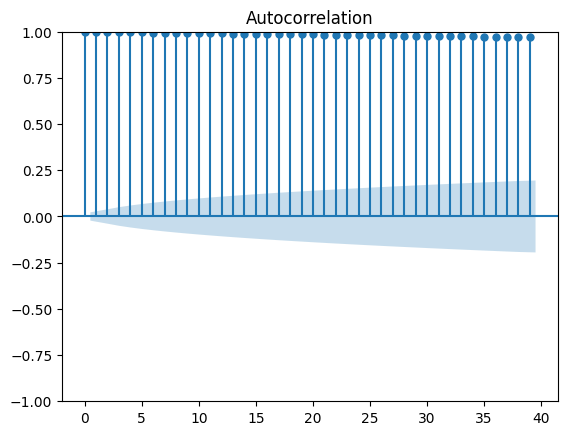

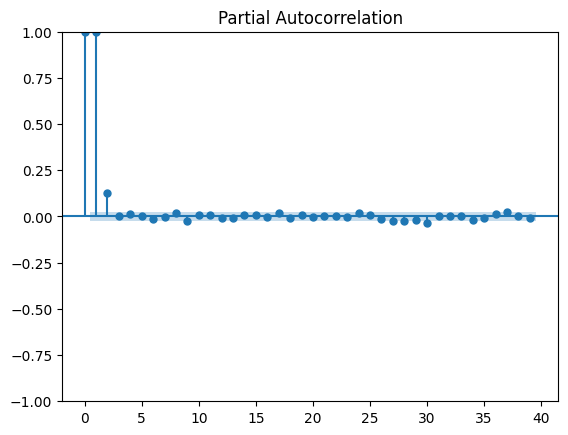

In [19]:
plot_acf(df['Ex_rate'])
plot_pacf(df['Ex_rate'])
plt.show()

In [20]:
model = ARIMA(df['Ex_rate'], order=(1, 1, 1))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

In [21]:
model_fit = model.fit()

In [22]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 12 Jun 2025   AIC                         -56102.322
Time:                        05:24:00   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

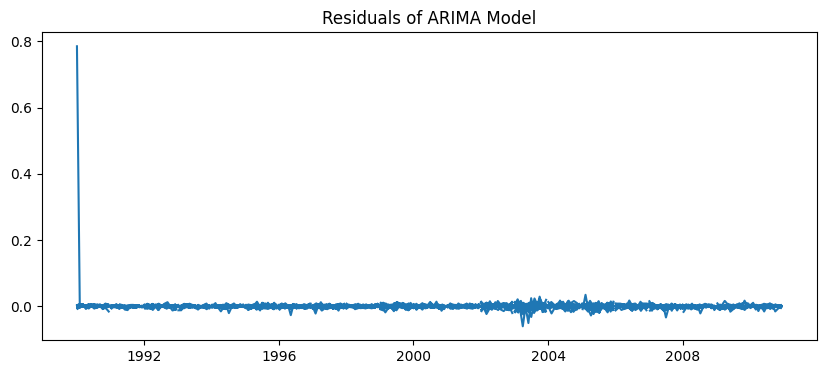

In [23]:
residuals = model_fit.resid
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Residuals of ARIMA Model")
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


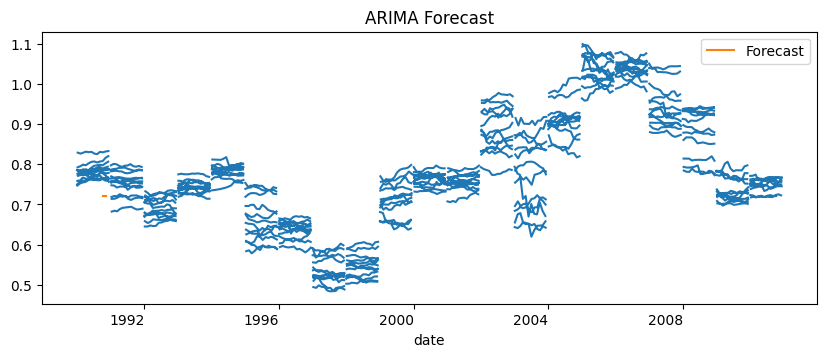

In [24]:
forecast = model_fit.forecast(steps=30)
df['Ex_rate'].plot(label='Historical', figsize=(10,4))
forecast.plot(label='Forecast', legend=True)
plt.title("ARIMA Forecast")
plt.show()

In [25]:
##Exponential Smoothing

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [27]:
model_es = ExponentialSmoothing(df['Ex_rate'], trend='mul', seasonal=None)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
model_es_fit = model_es.fit()

In [29]:
forecast_es = model_es_fit.forecast(30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


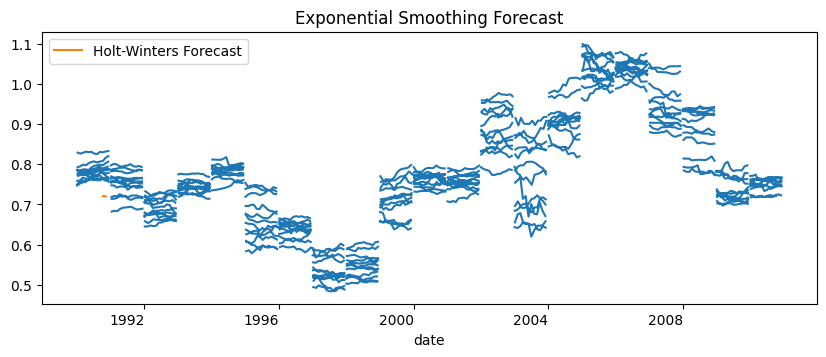

In [30]:
df['Ex_rate'].plot(label='Historical', figsize=(10,4))
forecast_es.plot(label='Holt-Winters Forecast', legend=True)
plt.title("Exponential Smoothing Forecast")
plt.show()

In [31]:
##Evaluation & Comparison

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [33]:
train = df.iloc[:-30]
test = df.iloc[-30:]

In [34]:
model = ARIMA(train['Ex_rate'], order=(1, 1, 1))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

In [35]:
model_fit = model.fit()

In [36]:
forecast_arima = model_fit.forecast(steps=30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [37]:
model_es = ExponentialSmoothing(train['Ex_rate'], trend='mul')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [38]:
model_es_fit = model_es.fit()

In [39]:
forecast_es = model_es_fit.forecast(30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [40]:
print("ARIMA RMSE:", np.sqrt(mean_squared_error(test, forecast_arima)))

ARIMA RMSE: 0.016632177913116195


In [41]:
print("ES RMSE:", np.sqrt(mean_squared_error(test, forecast_es)))

ES RMSE: 0.01623855338167026


In [42]:
print("ARIMA MAE:", mean_absolute_error(test, forecast_arima))


ARIMA MAE: 0.013494600805886207


In [43]:
print("ES MAE:", mean_absolute_error(test, forecast_es))

ES MAE: 0.013260192890443213
